### Wykres 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import time

In [2]:
sizes, reps = np.arange(10,201,10) , 10000

In [3]:
def sim_r_squared(n):
    x = np.random.normal(0,1,size=n).reshape(-1,1)
    y = 1 + np.random.normal(0,1,size=n).reshape(-1,1) + x
    model = LinearRegression().fit(x, y)
    r_squared = model.score(x,y)
    return (r_squared)
    

In [4]:
r_squared_mean = []
r_squared_q95 = []
r_squared_q5 = []

In [5]:
time_start = time.time()
for s in range(len(sizes)):
    print (sizes[s])
    result = [sim_r_squared(sizes[s]) for _ in range(reps)]
    r_squared_mean.append(np.mean(result))
    r_squared_q95.append(np.quantile(result,0.95))
    r_squared_q5.append(np.quantile(result,0.05))

process_time = time.time()-time_start
                        

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


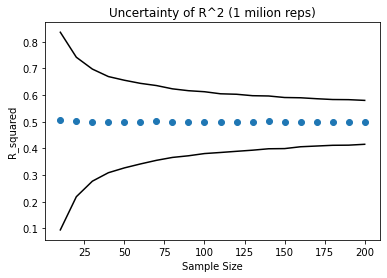

In [6]:
plt.scatter(sizes, r_squared_mean)
plt.ylabel('R_squared')
plt.xlabel('Sample Size')
plt.title('Uncertainty of R^2 (1 milion reps)')
plt.plot(sizes, r_squared_q95, color='black')
plt.plot(sizes, r_squared_q5, color='black')
plt.show()

### Wykres 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import time   

In [8]:
def sim_r_squared_k(n,k,reps):
    x, result = np.ones([n,k+1]), []
    for _ in range(reps):
        x[0:n, 0:k] = np.random.randn(n,k)
        y = x.sum(1) + np.random.randn(n)
        model = LinearRegression().fit(x, y)
        result.append(model.score(x, y))
    return result

In [9]:
def run(k, reps=10000, maxn=200):
    sizes, reps = range(10, maxn + 10, 10), 10000
    r_squared_mean = []
    r_squared_q95 = []
    r_squared_q5 = []

    for s in sizes:
        print(s)
        result = sim_r_squared_k(s, k, reps)
        r_squared_mean.append(np.mean(result))
        r_squared_q95.append(np.quantile(result, 0.95))
        r_squared_q5.append(np.quantile(result, 0.05))

    plt.scatter(sizes, r_squared_mean)
    plt.ylabel('R_squared')
    plt.xlabel('Sample Size')
    plt.title('Uncertainty of R^2 - nine variables')
    plt.plot(sizes, r_squared_q95, color='black')
    plt.plot(sizes, r_squared_q5, color='black')
    plt.show()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


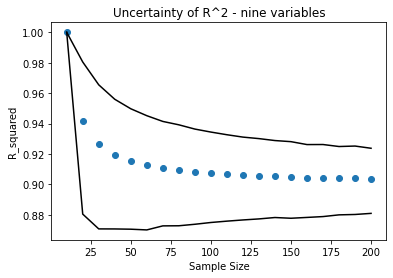

In [10]:
run(9, 10000, 200)